<a href="https://colab.research.google.com/github/saugata-malakar/Automatic-leaf-infection-identifier/blob/master/Resume_Screening_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gauravduttakiit_resume_dataset_path = kagglehub.dataset_download('gauravduttakiit/resume-dataset')

print('Data source import complete.')


100%|██████████| 383k/383k [00:00<00:00, 558kB/s]

Extracting files...
Data source import complete.


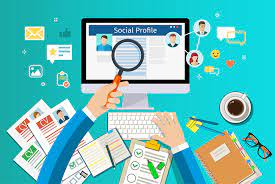

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.


IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('/content/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


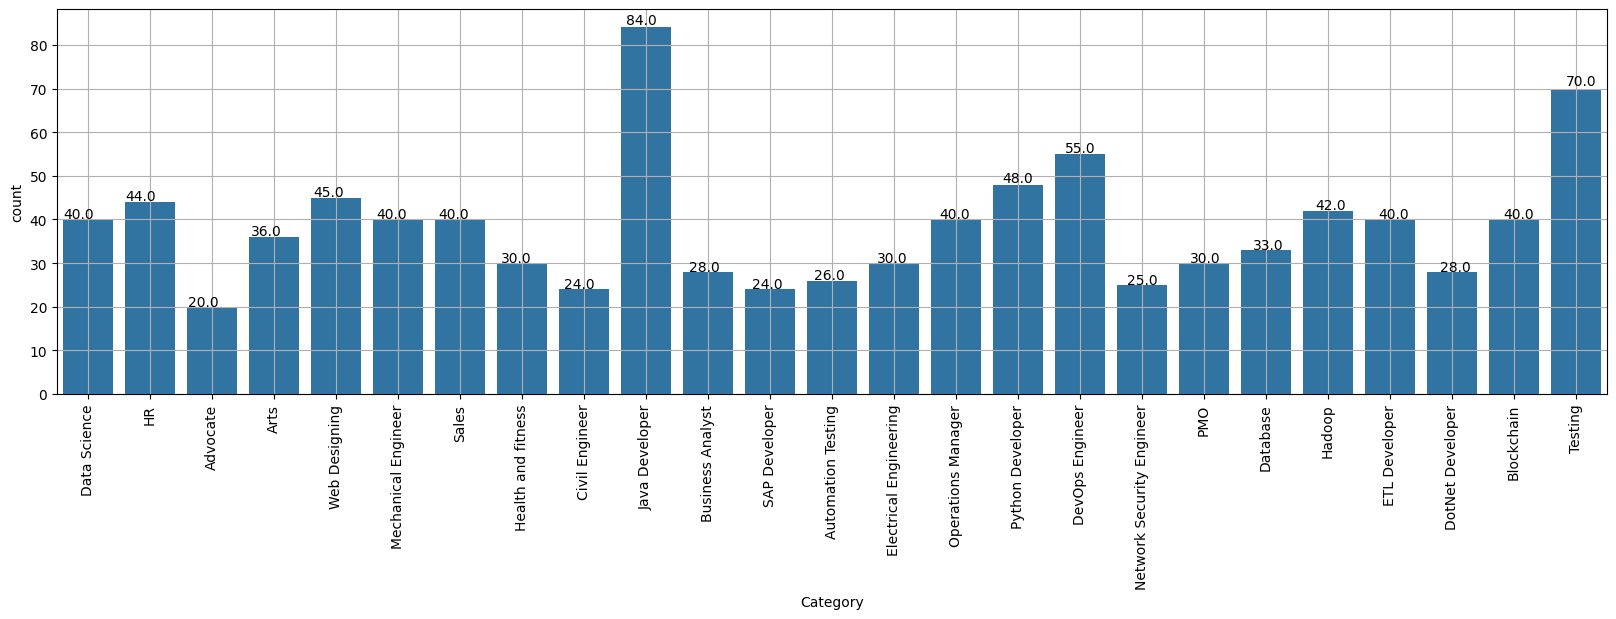

In [6]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

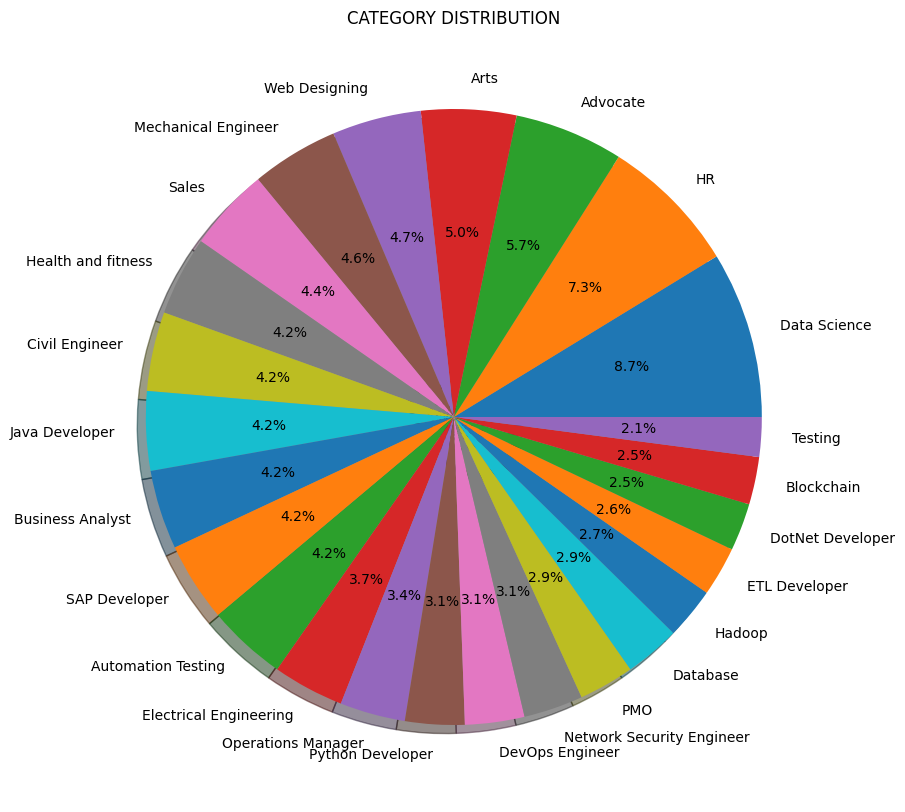

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [8]:
resumeDataSet.duplicated(subset=['Resume']).value_counts()

,count
True,796
False,166


In [9]:
resumeDataSet[resumeDataSet.duplicated()==True]

,Category,Resume,cleaned_resume
10,Data Science,Skills * Programming Languages: Python (pandas...,
11,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
12,Data Science,"Areas of Interest Deep Learning, Control Syste...",
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [10]:
resumeDataSet.iloc[10]['Resume']

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
resumeDataSet[resumeDataSet['Resume']=='Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js']

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
10,Data Science,Skills * Programming Languages: Python (pandas...,
20,Data Science,Skills * Programming Languages: Python (pandas...,
30,Data Science,Skills * Programming Languages: Python (pandas...,


No charts were generated by quickchart


In [12]:
resumeDataSet.drop_duplicates(subset=['Resume'], keep='first',inplace = True)
resumeDataSet.reset_index(inplace=True,drop=True)
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [13]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        166 non-null    object
 1   Resume          166 non-null    object
 2   cleaned_resume  166 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [14]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [15]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [16]:
resumeDataSet_d=resumeDataSet.copy()

In [21]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


In [20]:
!pip install nltk
import nltk
nltk.download('punkt_tab') # Downloading the 'punkt_tab' resource for sentence tokenization
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


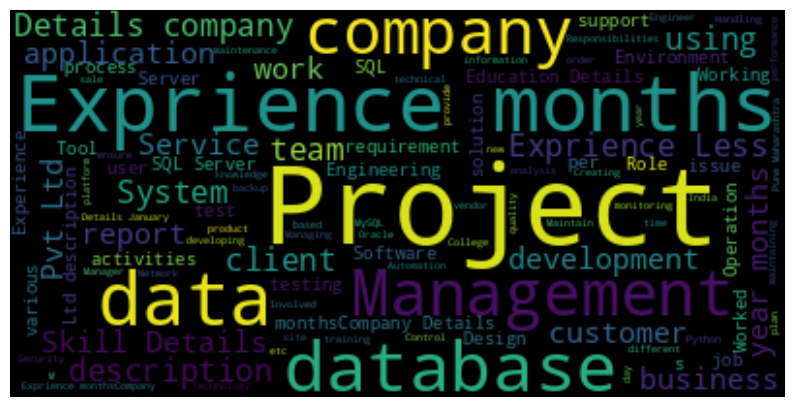

In [22]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [24]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [25]:
resumeDataSet.Category.value_counts()

,count
Category,
15,13
7,11
0,10
12,10
6,10
2,7
8,7
23,7
9,7


In [26]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

,count
Category,
Java Developer,13
Database,11
Advocate,10
HR,10
Data Science,10
Automation Testing,7
DevOps Engineer,7
Testing,7
DotNet Developer,7


In [27]:
del resumeDataSet_d #clearing the space occupied

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(132, 7351)
(34, 7351)


In [29]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of KNeighbors Classifier on training set: 0.89
Accuracy of KNeighbors Classifier on test set:     0.82


In [30]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train, clf.predict(X_train))))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.40      0.57         5
           2       0.71      0.83      0.77         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       0.90      1.00      0.95         9
           8       1.00      0.17      0.29         6
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         4
          11       0.67      1.00      0.80         4
          12       1.00      0.75      0.86         8
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       0.91      1.00      0.

In [31]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.

In [43]:
pip install pdfplumber python-docx


In [33]:
import pdfplumber
from docx import Document
import os

# Function to extract text from file
def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                if page.extract_text():
                    text += page.extract_text() + ' '
    elif file_path.endswith('.docx'):
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])
    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    else:
        print("Unsupported file format")
    return text.strip()

# Function to predict resume category
def predict_resume_category(file_path):
    text = extract_text_from_resume(file_path)
    if not text:
        return "Could not extract text from the file."

    cleaned_text = cleanResume(text)
    vectorized = word_vectorizer.transform([cleaned_text])
    prediction = clf.predict(vectorized)[0]
    predicted_label = le.inverse_transform([prediction])[0]
    return predicted_label


In [42]:
from pdf2image import convert_from_path
import pytesseract

def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        try:
            # Try normal PDF extraction
            import pdfplumber
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + ' '
        except:
            pass

        if not text.strip():
            # Fall back to OCR
            images = convert_from_path(file_path)
            for img in images:
                text += pytesseract.image_to_string(img) + ' '

    elif file_path.endswith('.docx'):
        from docx import Document
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])
    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    else:
        print("Unsupported file format")

    return text.strip()


In [37]:
!pip install pdf2image

In [38]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (174 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [41]:
from pdf2image import convert_from_path
import pytesseract

def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        try:
            # Try normal PDF extraction
            import pdfplumber
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + ' '
        except:
            pass

        if not text.strip():
            # Fall back to OCR if normal extraction fails #Added a condition to use OCR only if text extraction using pdfplumber fails.
            images = convert_from_path(file_path) # This line imports the necessary library for converting PDF to images.
            for img in images:
                text += pytesseract.image_to_string(img) + ' '

    elif file_path.endswith('.docx'):
        from docx import Document
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])
    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    else:
        print("Unsupported file format")

    return text.strip()

In [40]:
!pip install pytesseract

In [50]:
pip install pdf2image pytesseract pdfplumber python-docx


In [52]:
# Required Libraries
import os
from pdf2image import convert_from_path
import pytesseract
import pdfplumber
from docx import Document

def extract_text_from_resume(file_path):
    """
    Extracts text from PDF, DOCX, or TXT resumes. Supports OCR for scanned PDFs.
    """
    text = ''

    # PDF Handling
    if file_path.endswith('.pdf'):
        try:
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + '\n'
        except:
            pass

        # If pdfplumber fails (scanned PDF), fall back to OCR
        if not text.strip():
            print("[INFO] Using OCR to extract text from scanned PDF...")
            images = convert_from_path('/content/resume tri.pdf')
            for img in images:
                text += pytesseract.image_to_string(img) + '\n'

    # DOCX Handling
    elif file_path.endswith('.docx'):
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])

    # TXT Handling
    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

    else:
        print("[ERROR] Unsupported file format. Please upload PDF, DOCX, or TXT.")

    return text.strip()

# ========== USAGE ==========

# Provide your resume file path here
resume_path = "resume_tri.pdf"  # change to your file name

# Extract text
extracted_text = extract_text_from_resume(resume_path)

# Show preview
if extracted_text:
    print("✅ Extracted Text Preview:\n")
    print(extracted_text[:3000])  # preview up to 3000 chars
else:
    print("❌ Could not extract text from the file.")


[INFO] Using OCR to extract text from scanned PDF...
✅ Extracted Text Preview:

TRINAKSHI SAHA | 23EE10074

 

ELECTRICAL ENGG. (B.TECH 4Y)

EDUCATION
Year Degree/Exam Institute CGPA/Marks
2027 B.TECH, Electrical Engineering Indian Institute of Technology Kharagpur 6.06 / 10
2023 Class XII, WBCHSE Annada Sundari Hindu Balika Vidyapith, Kolkata 68.2%
2021 Class X,WBBSE Annada Sundari Hindu Balika Vidyapith, Kolkata 88.4%
INTERNSHIPS AND PROJECTS
Spam Email Detection] Self Project [Jun' 24 - July’ 24]

* Enhanced fraud detection with Isolation Project , achieving 27% detection rates surpassing LOF’s 2% amd SVM 0% in imbalanced sheet

* Conducted through EDA to uncover transaction patterns,amount distributions and feature correlations for improved model accuracy

* Optimized Fraud Detection Precision and Recall using Isolation Forest and made use of EDA finding Patterns and feature correlation.
WhatsApp Chat Analyzer| Self Project [May' 24 - Jun' 24]
© Developed and deployed WhatsApp Chat

In [70]:
# Load your dataset (CSV)
df = pd.read_csv("/content/resume tri.pdf")



UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 67: invalid start byte

In [64]:
from pdf2image import convert_from_path
import pytesseract
import pdfplumber
from docx import Document

def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        try:
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + '\n'
        except:
            pass

        if not text.strip():
            print("[INFO] OCR fallback activated.")
            images = convert_from_path(file_path)
            for img in images:
                text += pytesseract.image_to_string(img) + '\n'

    elif file_path.endswith('.docx'):
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])

    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

    return text.strip()


In [62]:
def predict_resume_category(file_path):
    text = extract_text_from_resume(file_path)
    if not text:
        return "❌ No text extracted.", None

    cleaned = clean_resume(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    category = le.inverse_transform([prediction])[0]

    return text[:3000], category  # preview + prediction


In [63]:
pip install pandas scikit-learn pdfplumber pdf2image pytesseract python-docx


In [78]:
# Step 1: Load dataset and train the model
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/Copy of Saugata_cv (1).pdf')
df.dropna(inplace=True)

# Clean resume text
def clean_resume(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    return ' '.join(text)

df['cleaned_resume'] = df['Resume'].apply(clean_resume)

# Encode labels
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# TF-IDF Vectorizer and model
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()
y = df['Category_encoded']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Step 2: Extract text from resume (with OCR support)
from pdf2image import convert_from_path
import pytesseract
import pdfplumber
from docx import Document

def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        try:
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + '\n'
        except:
            pass

        if not text.strip():
            images = convert_from_path(file_path)
            for img in images:
                text += pytesseract.image_to_string(img) + '\n'

    elif file_path.endswith('.docx'):
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])

    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

    return text.strip()

# Step 3: Predict resume category
def predict_resume_category(file_path):
    text = extract_text_from_resume(file_path)
    if not text:
        return "❌ No text extracted.", None

    cleaned = clean_resume(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    category = le.inverse_transform([prediction])[0]

    return text[:3000], category

# Run prediction on uploaded resume
resume_file = '/mnt/data/resume tri.pdf'
extracted_text, predicted_category = predict_resume_category(resume_file)
extracted_text, predicted_category


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 10: invalid continuation byte

In [81]:
import streamlit as st
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from pdf2image import convert_from_path
import pytesseract
import pdfplumber
from docx import Document
import tempfile
import os

# ---------- Helper Functions ----------
def clean_resume(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    return ' '.join(text)

def extract_text_from_resume(file_path):
    text = ''
    if file_path.endswith('.pdf'):
        try:
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + '\n'
        except:
            pass
        if not text.strip():
            images = convert_from_path(file_path)
            for img in images:
                text += pytesseract.image_to_string(img) + '\n'
    elif file_path.endswith('.docx'):
        doc = Document(file_path)
        text = ' '.join([para.text for para in doc.paragraphs])
    elif file_path.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
    return text.strip()

# ---------- Load & Train Model ----------
def load_and_train_model():
    df = pd.read_csv('UpdatedResumeDataSet.csv')
    df.dropna(inplace=True)
    df['cleaned_resume'] = df['Resume'].apply(clean_resume)
    le = LabelEncoder()
    df['Category_encoded'] = le.fit_transform(df['Category'])
    tfidf = TfidfVectorizer(max_features=1500)
    X = tfidf.fit_transform(df['cleaned_resume']).toarray()
    y = df['Category_encoded']
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    return model, tfidf, le

# ---------- Streamlit App ----------
st.set_page_config(page_title="Resume Category Predictor", layout="centered")
st.title("🤖 Resume Category Classifier")
st.write("Upload a resume (PDF/DOCX/TXT) and get the predicted job category!")

model, tfidf, le = load_and_train_model()

uploaded_file = st.file_uploader("Choose a resume file", type=["pdf", "docx", "txt"])

if uploaded_file is not None:
    with tempfile.NamedTemporaryFile(delete=False, suffix=os.path.splitext(uploaded_file.name)[1]) as tmp_file:
        tmp_file.write(uploaded_file.read())
        tmp_path = tmp_file.name

    resume_text = extract_text_from_resume(tmp_path)

    if resume_text:
        cleaned = clean_resume(resume_text)
        vector = tfidf.transform([cleaned])
        prediction = model.predict(vector)[0]
        category = le.inverse_transform([prediction])[0]

        st.subheader("📄 Extracted Resume Text (Preview):")
        st.text(resume_text[:3000])

        st.success(f"🔍 Predicted Resume Category: {category}")
    else:
        st.error("❌ Could not extract any text from the file. Try another resume.")

2025-04-09 17:59:23.271 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 17:59:23.272 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 17:59:23.599 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-09 17:59:23.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 17:59:23.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 17:59:23.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 17:59:23.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [80]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.9 MB/s eta 0:00:00


In [83]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [84]:
pip install streamlit pandas scikit-learn pdfplumber pdf2image pytesseract python-docx
